
BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Problem Statement:
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

 

Dataset Attributes
Here is the description of all the variables :

Variable: Definition
ID: Unique client ID
age: Age of the client
job: Type of job
marital: Marital status of the client
education: Education level
default: Credit in default.
housing: Housing loan
loan: Personal loan
contact: Type of communication
month: Contact month
day_of_week: Day of week of contact
duration: Contact duration
campaign: number of contacts performed during this campaign to the client
pdays: number of days that passed by after the client was last contacted
previous: number of contacts performed before this campaign
poutcome: outcome of the previous marketing campaign


Output variable (desired target):
Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df_test=pd.read_csv("termdeposit_test.csv")
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


## 1. Identification of variables and data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


## 2. Analyzing the basic metrics

In [5]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 3. Non-Graphical Univariate Analysis

In [6]:
df.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

Skewness is very high for balance, duration,campaign , pdays and previous columns

## 4. Checking for missing values and duplicates from dataframe

In [7]:
# checking for duplicate values
df.duplicated().sum()

0

Zero duplicates found

In [8]:
# checking for empty spaces
df.isin(['NAN','NA','N/A','-',' ','?',np.nan]).sum().any()

False

No null values found

In [9]:
#checking for null values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

No null values are present in the data

## 5. Graphical Univariate Analysis

In [10]:
#Setting the display for our graph display

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams ['figure.figsize'] = (10, 7)
plt.rcParams ['figure.facecolor'] = '#FFE5B4'

<AxesSubplot:xlabel='subscribed', ylabel='count'>

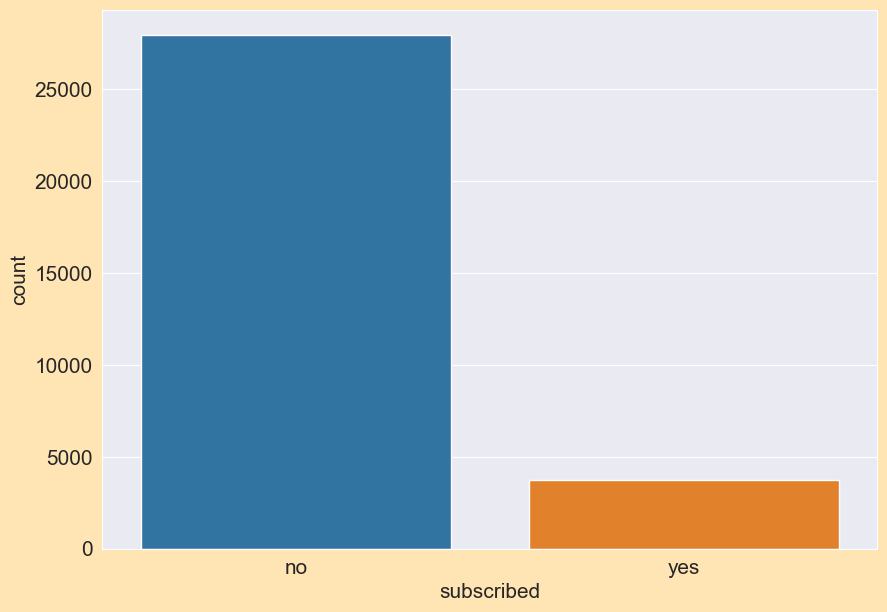

In [11]:
# Analysing the target data
df["subscribed"].value_counts()
sns.countplot(df["subscribed"])

Data for number of people who subscribe is quite low than those who does not.

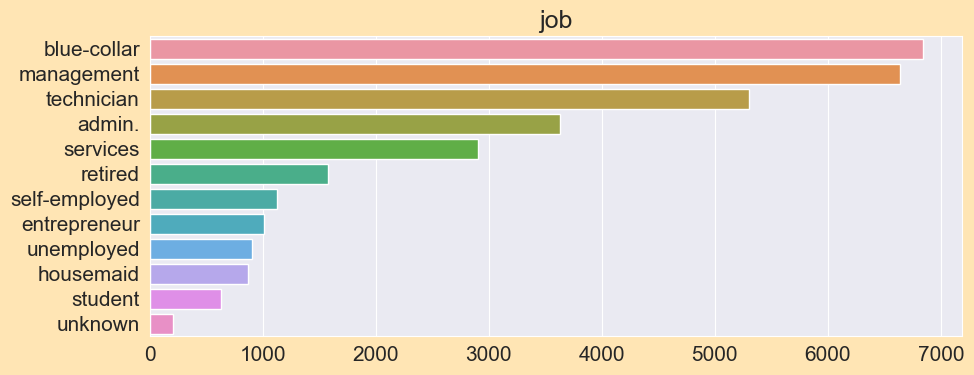

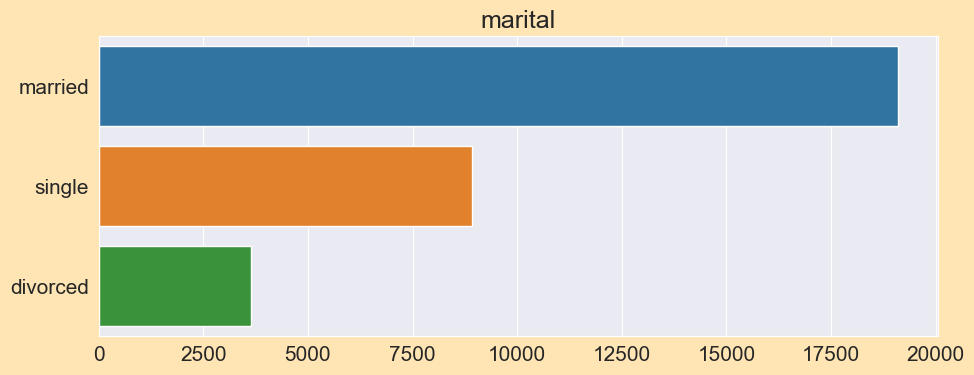

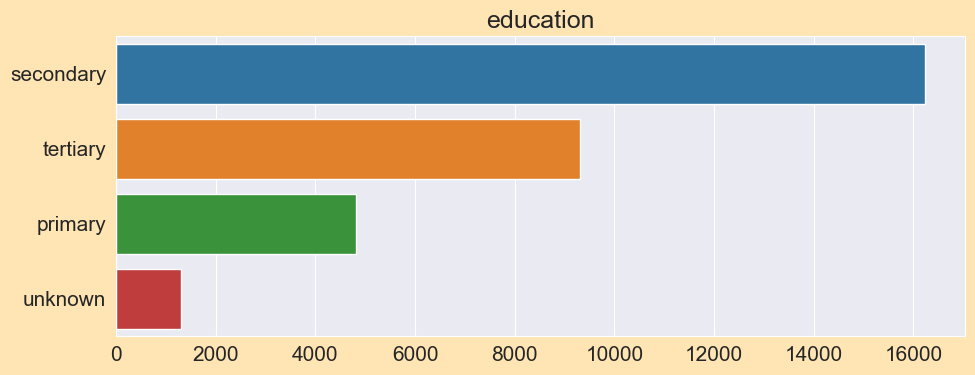

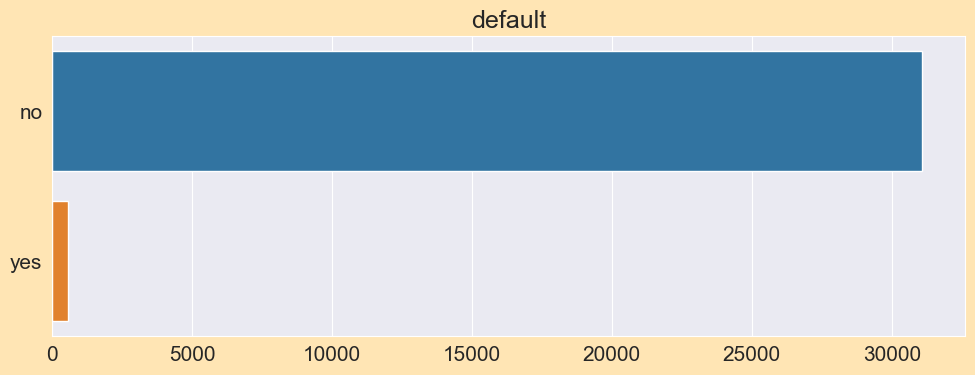

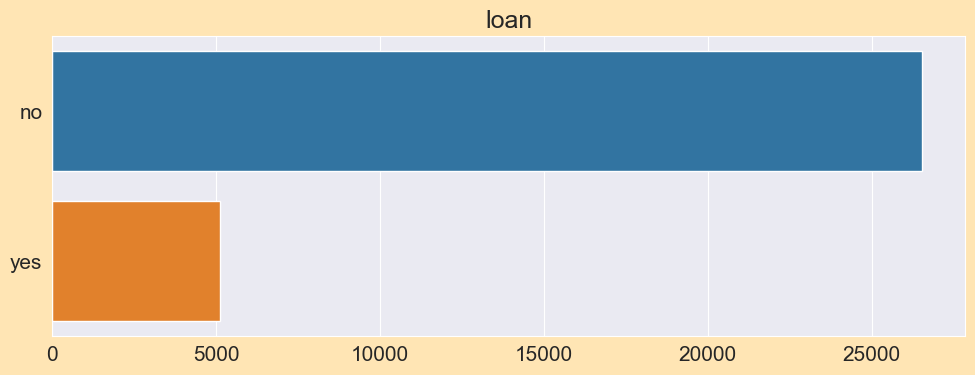

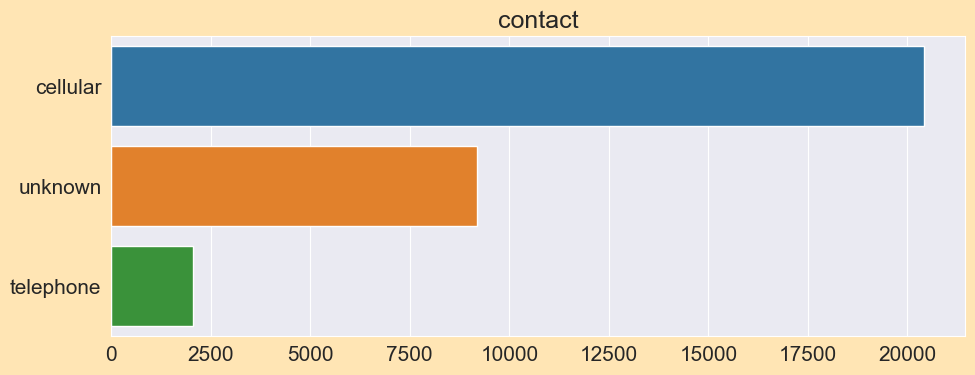

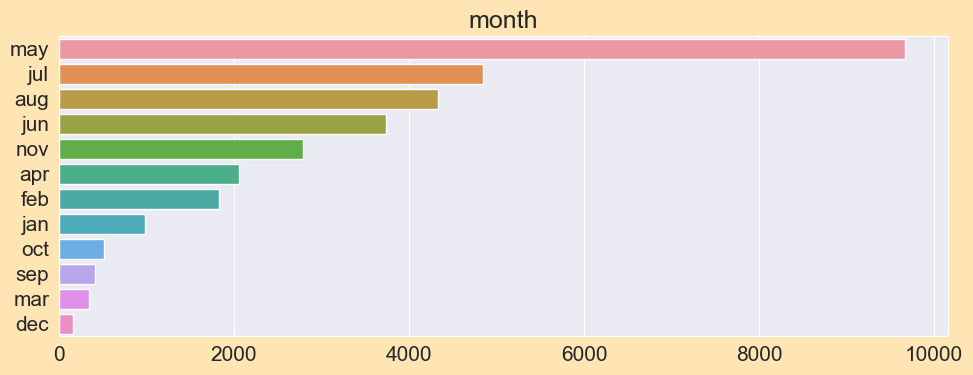

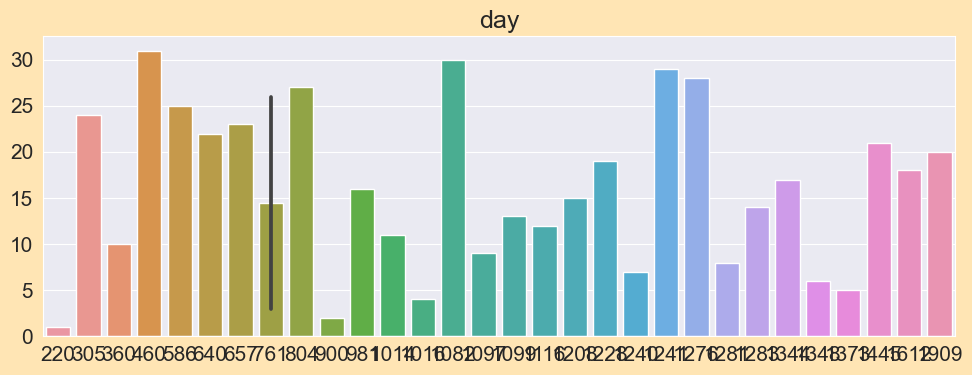

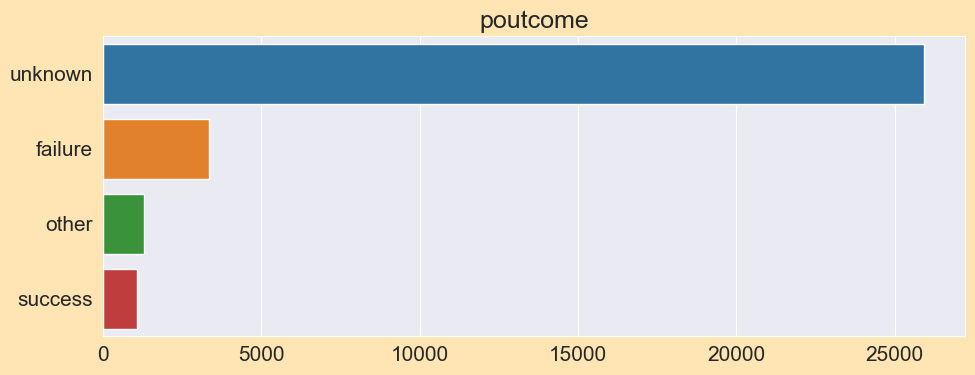

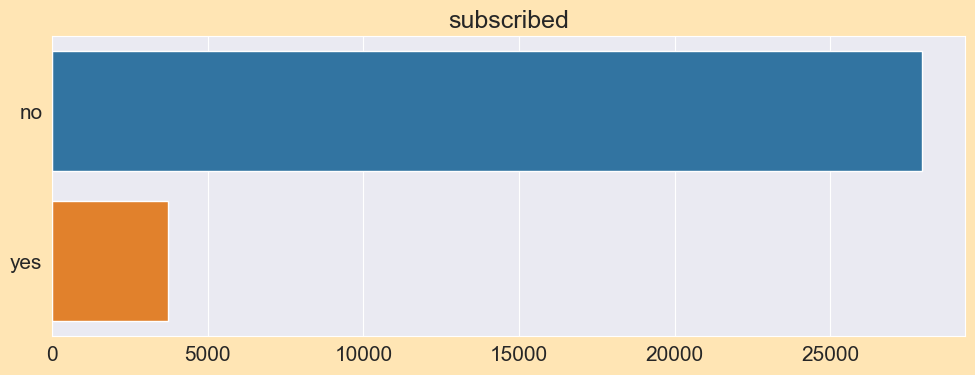

In [12]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','subscribed']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

## 6. Multivariate Analysis

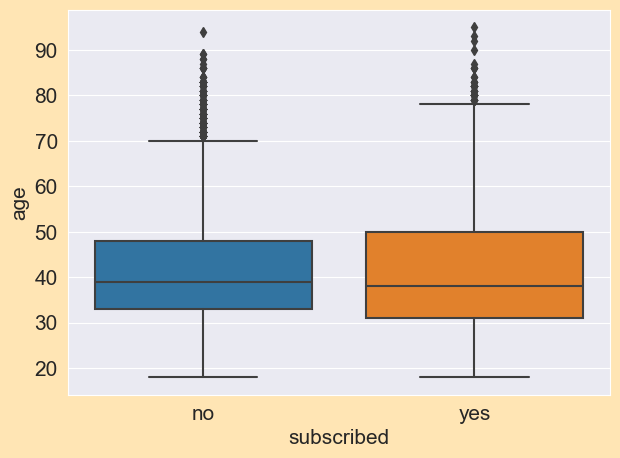

In [13]:
# Plotting the box plot 
plt.figure(figsize=(7,5))
sns.boxplot(y='age',x="subscribed", data= df)
plt.show()

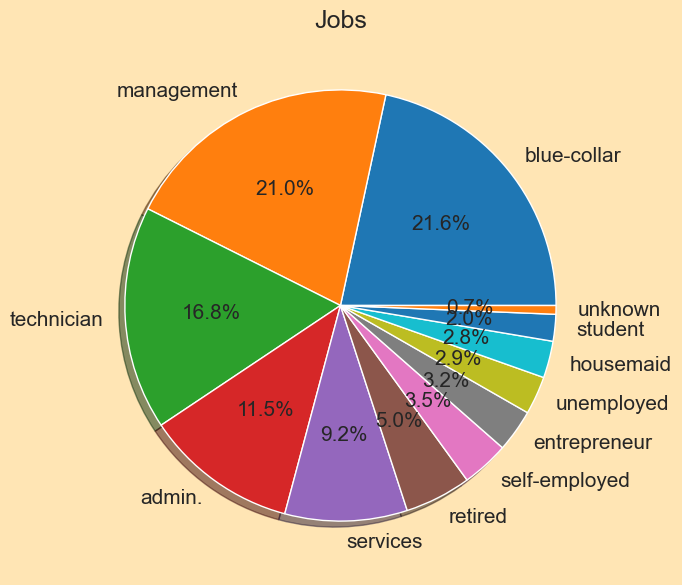

In [14]:
#pie plot of job 
plt.figure(figsize=(7,7))
plt.pie(df.job.value_counts(),labels=df.job.value_counts().index,shadow = True,autopct='%1.1f%%')
plt.title('Jobs')
plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

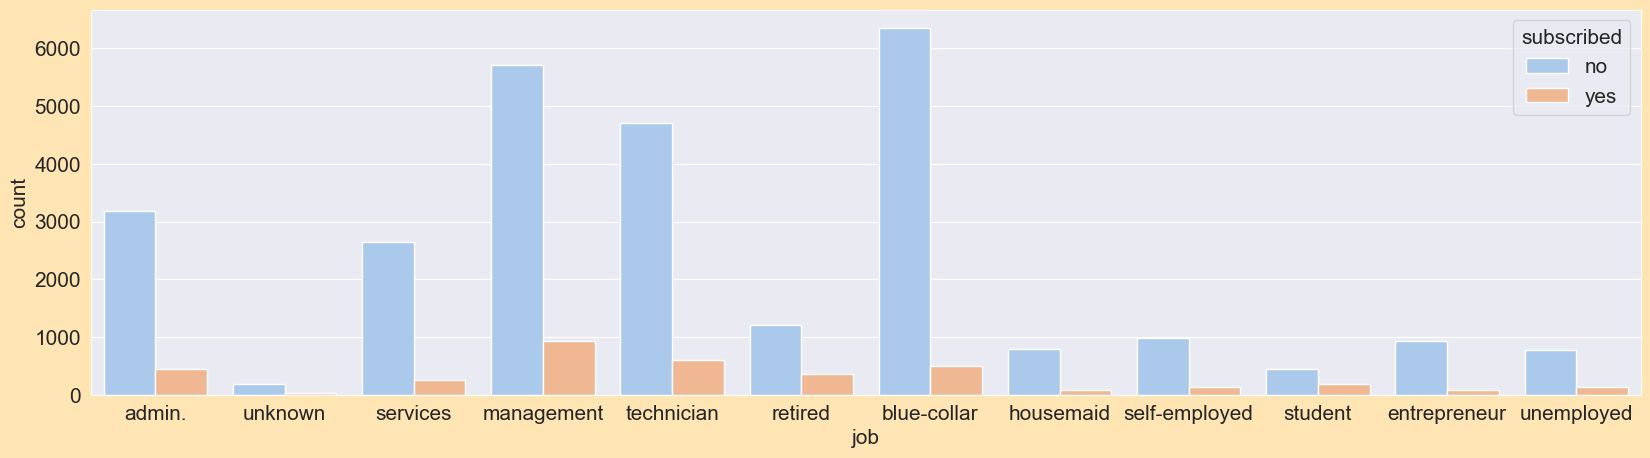

In [15]:
#Lets explore the count of accept and reject term deposit on the basis of different type of job 
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df.job, hue=df.subscribed,ax=ax, palette='pastel')

#### Observation - Blue-collar, management and technician showed maximum interest in subscription.

#### while management took the maximum subscriptions.

Text(0.5, 1.0, 'Count of yes and no for different category of marital status')

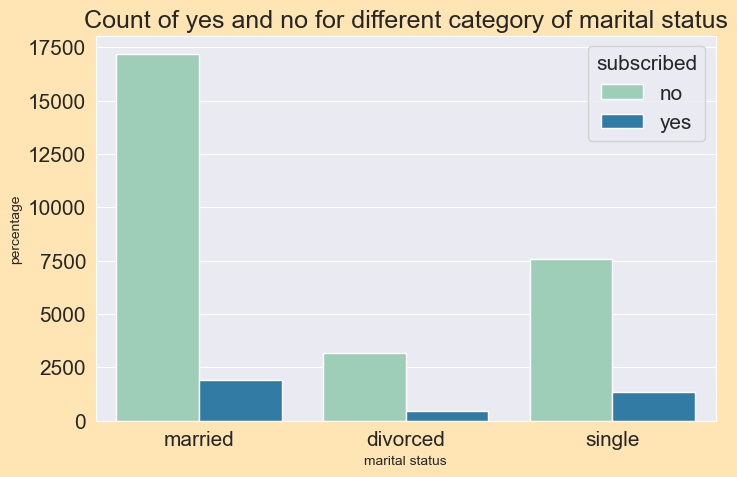

In [16]:

#Lets explore the count of accept and reject term deposit on the basis of different type of marital status
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(df.marital, hue=df.subscribed,ax=ax, palette='YlGnBu')
plt.xlabel('marital status',fontsize=10)
plt.ylabel('percentage',fontsize=10)
plt.title('Count of yes and no for different category of marital status')

#### Observation - Married and Single have more interest in subscription.

Text(0.5, 1.0, 'Count of yes and no for different education level')

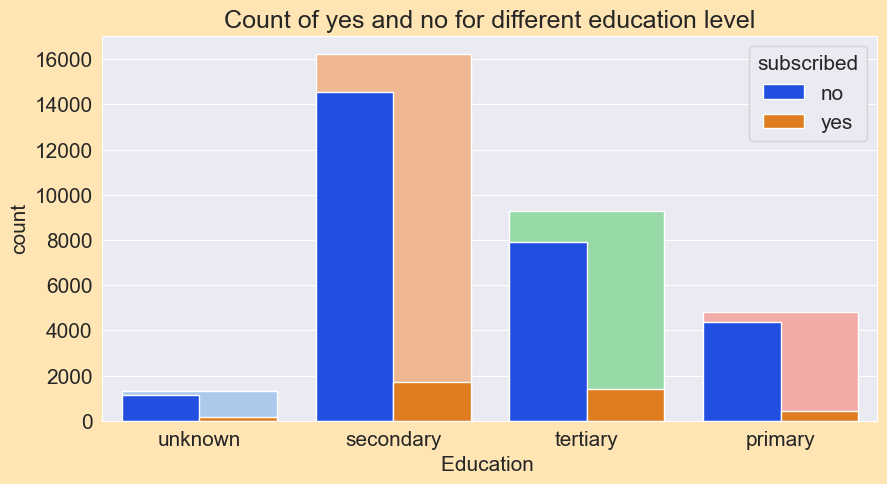

In [17]:
# deposit term on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df.education, ax=ax, palette='pastel')
sns.countplot(df.education, hue=df.subscribed,ax=ax, palette='bright')
plt.xlabel('Education ')
plt.title('Count of yes and no for different education level')

#### Observation - People with secondary and tertiary education were more driven towards subscribing to term deposits.

Text(0.5, 1.0, 'Count of yes and no for every month')

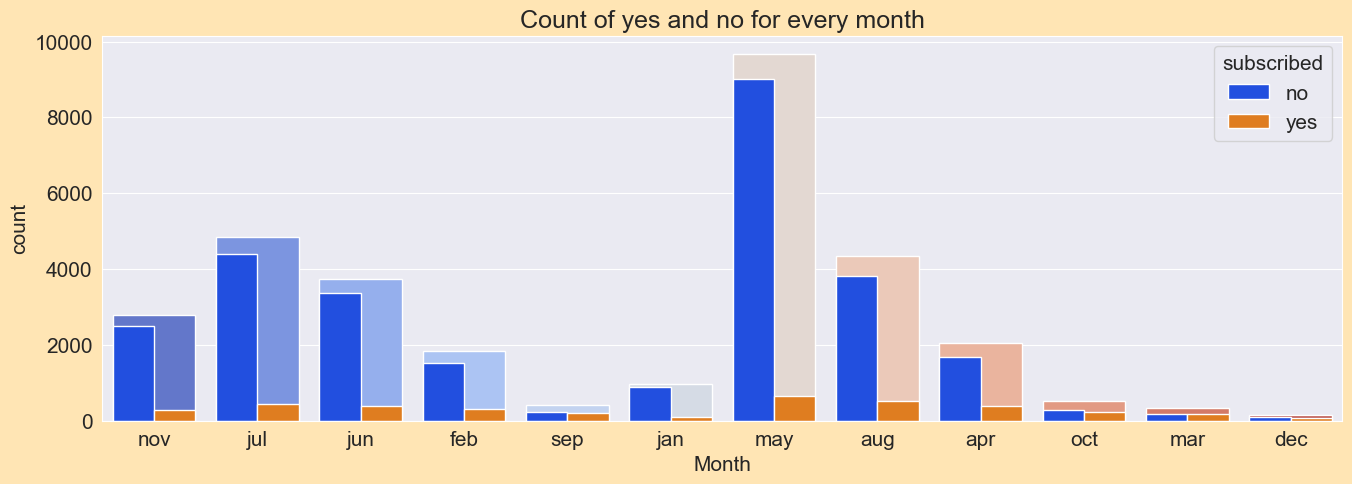

In [18]:

#Lets explore the count of accept and reject term deposit every month
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(df.month,palette='coolwarm')
sns.countplot(df.month, hue=df.subscribed,ax=ax, palette='bright')
plt.xlabel('Month')
plt.title('Count of yes and no for every month')

#### Observation - There were maximum subscriptions in the month of may while most subscription ratio was seen in month of march.

## 7. Encoding the categorical Data

In [19]:
# Changing categorical data to numerical
ohe=OneHotEncoder()
x=df[["marital",  "education",  "default",  "housing",   "loan",  "contact",  "poutcome"]].values
x=ohe.fit_transform(x).toarray()
y=z=np.hstack(ohe.categories_)
merge= pd.DataFrame(data=x,columns=y)
df_n=pd.concat([df,merge],axis=1)
df_n

,ID,age,job,marital,education,default,balance,housing,loan,contact,...,yes,no,yes,cellular,telephone,unknown,failure,other,success,unknown
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# Changing categorical data to numerical
ohe=OneHotEncoder()
x=df_test[["marital",  "education",  "default",  "housing",   "loan",  "contact",  "poutcome"]].values
x=ohe.fit_transform(x).toarray()
y=z=np.hstack(ohe.categories_)
merge= pd.DataFrame(data=x,columns=y)
df_test_n=pd.concat([df_test,merge],axis=1)
pd.set_option('display.max_columns',None)
df_test_n

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,divorced,married,single,primary,secondary,tertiary,unknown,no,yes,no,yes,no,yes,cellular,telephone,unknown,failure,other,success,unknown
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Dropping off columns that have categorical values and co related columns to avoid multicolinearity.

In [21]:
df_n.drop(["contact","unknown","marital","divorced","housing","loan","poutcome","other","education","secondary","default","no"] ,axis=1, inplace=True)

In [22]:
df_test_n.drop(["contact","unknown","marital","divorced","housing","loan","poutcome","other","education","secondary","default","no"] ,axis=1, inplace=True)

In [23]:
df_n.drop("ID" ,axis=1, inplace=True)

In [24]:
df_test_n.drop("ID" ,axis=1, inplace=True)

Using Label Encoder to encode rest of the categorical columns with grater number of unique values.

In [25]:
le=LabelEncoder()

In [26]:
df_n["job"]=le.fit_transform(df_n["job"])
df_n["month"]=le.fit_transform(df_n["month"])
df_test_n["job"]=le.fit_transform(df_test_n["job"])
df_test_n["month"]=le.fit_transform(df_test_n["month"])

In [27]:
df_n

,age,job,balance,day,month,duration,campaign,pdays,previous,subscribed,married,single,primary,tertiary,yes,yes,yes,cellular,telephone,failure,success
0,56,0,1933,19,9,44,2,-1,0,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,31,11,3,20,5,91,2,-1,0,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,27,7,891,18,5,240,1,-1,0,no,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,57,4,3287,22,6,867,1,84,3,yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,31,9,119,4,3,380,1,-1,0,no,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,0,12,8,116,2,-1,0,no,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31643,53,4,380,5,6,438,2,-1,0,yes,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
31644,32,4,312,7,1,37,3,-1,0,no,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31645,57,9,225,15,8,22,7,337,12,no,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Changing the target column-survived values from categorical to boolean.

In [28]:
df_n.replace("no",0,inplace=True)
df_n.replace("yes",1,inplace=True)

In [29]:
df_n

,age,job,balance,day,month,duration,campaign,pdays,previous,subscribed,married,single,primary,tertiary,yes,yes,yes,cellular,telephone,failure,success
0,56,0,1933,19,9,44,2,-1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,31,11,3,20,5,91,2,-1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,27,7,891,18,5,240,1,-1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,57,4,3287,22,6,867,1,84,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,31,9,119,4,3,380,1,-1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,0,12,8,116,2,-1,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31643,53,4,380,5,6,438,2,-1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
31644,32,4,312,7,1,37,3,-1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31645,57,9,225,15,8,22,7,337,12,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 8. Outlier treatment

In [30]:
#Treating the outliers by removing them.
z=np.abs(zscore(df_n))
dfn=df_n[(z<3).all(axis=1)]
dfn

,age,job,balance,day,month,duration,campaign,pdays,previous,subscribed,married,single,primary,tertiary,yes,yes,yes,cellular,telephone,failure,success
1,31,11,3,20,5,91,2,-1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,27,7,891,18,5,240,1,-1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,31,9,119,4,3,380,1,-1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,33,4,0,2,3,116,3,-1,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,50,9,1811,8,6,97,4,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2968,20,6,30,4,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31641,37,9,1309,6,6,442,2,-1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31642,29,4,0,12,8,116,2,-1,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31643,53,4,380,5,6,438,2,-1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
df_n

,age,job,balance,day,month,duration,campaign,pdays,previous,subscribed,married,single,primary,tertiary,yes,yes,yes,cellular,telephone,failure,success
0,56,0,1933,19,9,44,2,-1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,31,11,3,20,5,91,2,-1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,27,7,891,18,5,240,1,-1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,57,4,3287,22,6,867,1,84,3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,31,9,119,4,3,380,1,-1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,0,12,8,116,2,-1,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31643,53,4,380,5,6,438,2,-1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
31644,32,4,312,7,1,37,3,-1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31645,57,9,225,15,8,22,7,337,12,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


31647-25158=647, only 20% data has been removed while treating outliers, which is acceptable.

## 9. Variable transformations

In [32]:
#Checking skewness
dfn.skew()

age           0.440616
job           0.262158
balance       2.472046
day           0.071553
month        -0.512530
duration      1.593822
campaign      2.082644
pdays         3.134980
previous      4.196848
subscribed    2.977661
married      -0.421009
single        0.970435
primary       1.984606
tertiary      0.902576
yes           0.000000
yes          -0.279190
yes           1.790114
cellular     -0.701086
telephone     0.000000
failure       2.986862
success       0.000000
dtype: float64

In [34]:
# removing skewness

for i in dfn.columns:   
    try:
        if abs(dfn[f"{i}"].skew())>=1:
            print(i)
            dfn[f"{i}"]=np.sqrt(dfn[f"{i}"])
            print(i,"--",dfn[f"{i}"].skew())
    except:
        continue

balance
balance -- 1.0084153590412483
duration
duration -- 0.6867501100669451
campaign
campaign -- 1.240494288409508
pdays
pdays -- -0.9127504288009721
previous
previous -- 2.948388414466824
subscribed
subscribed -- 2.97766081810754
primary
primary -- 1.9846058238016817
failure
failure -- 2.9868619427510454


## 10. Correlation Analysis

<AxesSubplot:>

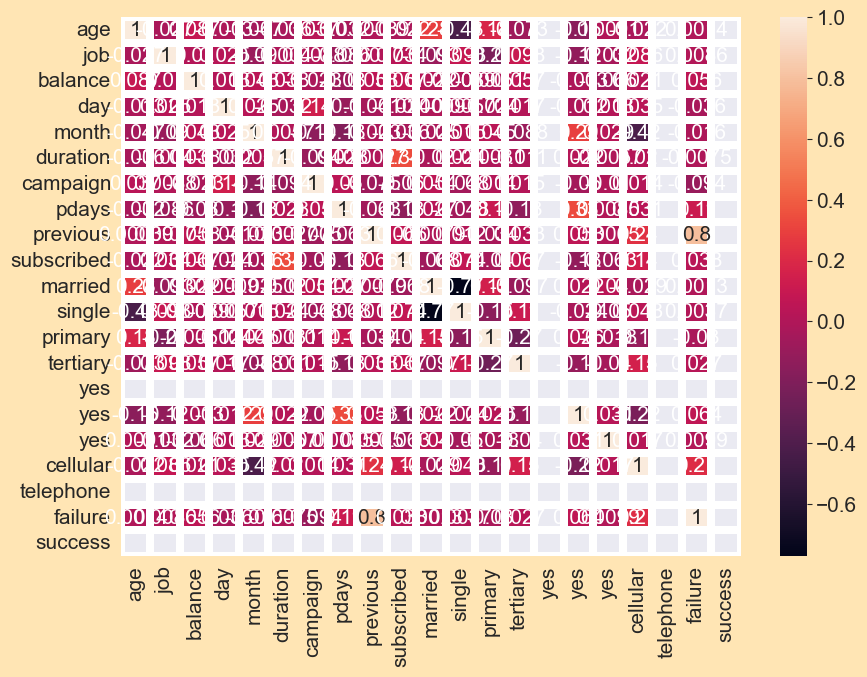

In [35]:
# To find multicolinearity
dfc=dfn.corr()
sns.heatmap(dfc, annot= True, linewidths=5.75)

In [36]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25158 entries, 1 to 31644
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         25158 non-null  int64  
 1   job         25158 non-null  int32  
 2   balance     23119 non-null  float64
 3   day         25158 non-null  int64  
 4   month       25158 non-null  int32  
 5   duration    25158 non-null  float64
 6   campaign    25158 non-null  float64
 7   pdays       2859 non-null   float64
 8   previous    25158 non-null  float64
 9   subscribed  25158 non-null  float64
 10  married     25158 non-null  float64
 11  single      25158 non-null  float64
 12  primary     25158 non-null  float64
 13  tertiary    25158 non-null  float64
 14  yes         25158 non-null  float64
 15  yes         25158 non-null  float64
 16  yes         25158 non-null  float64
 17  cellular    25158 non-null  float64
 18  telephone   25158 non-null  float64
 19  failure     25158 non-nul

In [37]:
dfn.isnull().sum().sum()

24338

In [38]:
dfn.dropna(inplace=True)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(dfn.values,i) for i in range(dfn.shape[1])]
vif["features"]=dfn.columns
print(vif)

    VIF Factor    features
0    20.201999         age
1     2.987692         job
2     3.168742     balance
3     4.109396         day
4     3.281088       month
5     8.819129    duration
6    11.122683    campaign
7    18.419093       pdays
8    10.962556    previous
9     1.415457  subscribed
10    6.267489     married
11    4.063659      single
12    1.292070     primary
13    1.690566    tertiary
14         NaN         yes
15    3.383225         yes
16    1.241419         yes
17   67.106176    cellular
18         NaN   telephone
19    4.057440     failure
20         NaN     success


Multicollinearity is high for the columns which were created using the one hot encoder so it is acceptable.

## 11. Resampling using SMOTE

0.0    2334
1.0    2334
Name: subscribed, dtype: int64


<AxesSubplot:xlabel='subscribed', ylabel='count'>

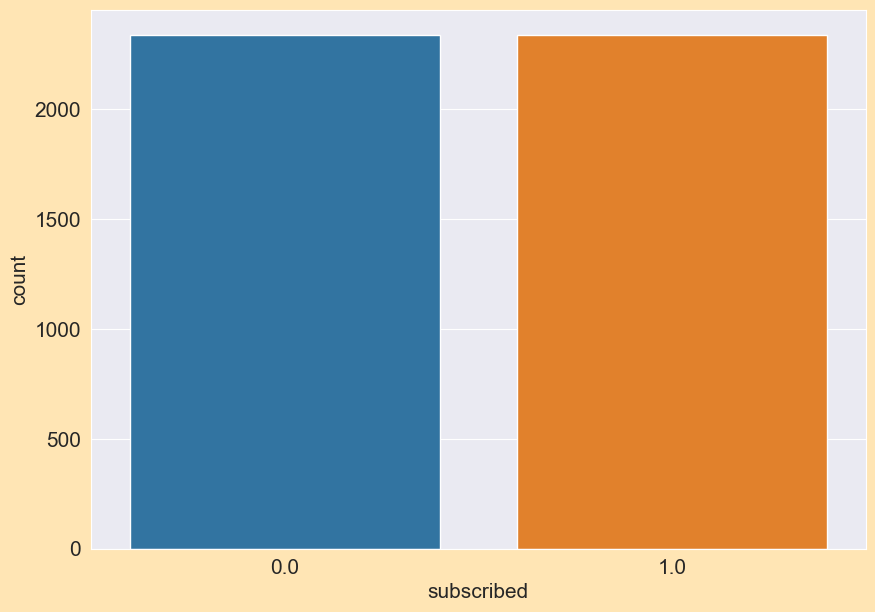

In [40]:
#Oversampling the data
dfy=dfn["subscribed"]
dfx=dfn.drop("subscribed",axis=1)
smt=SMOTE()
trainx, trainy=smt.fit_resample(dfx,dfy)
print(trainy.value_counts())
sns.countplot(trainy)

## 12.Scaling of Independent features

In [41]:
X=trainx
Y=trainy
st=StandardScaler()
x=st.fit_transform(X)
Xf=pd.DataFrame(data=x)

## 13. Machine Learning

### Preparing data for modelling

In [42]:
# Split 80-20 train vs test data
train_x,test_x,train_y,test_y=train_test_split(Xf,Y,test_size=0.2,random_state=15)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(3734, 20) (3734,)
(934, 20) (934,)


### Training and Testing

In [43]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.7612419700214133 
 [[334 114]
 [109 377]] 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       448
         1.0       0.77      0.78      0.77       486

    accuracy                           0.76       934
   macro avg       0.76      0.76      0.76       934
weighted avg       0.76      0.76      0.76       934
 

Cross Validation Score is : [0.76974565 0.7751004  0.78848728 0.7523427  0.76273458]
Mean Score : 0.7696821243867337


accuracy score for  GaussianNB() is :  0.7601713062098501 
 [[311 137]
 [ 87 399]] 
               precision    recall  f1-score   support

         0.0       0.78      0.69      0.74       448
         1.0       0.74      0.82      0.78       486

    accuracy                           0.76       934
   macro avg       0.76      0.76      0.76       934
weighted avg       0.76      0.76      0.76       934
 

Cross Validation Score is : [0.76840696 0.764

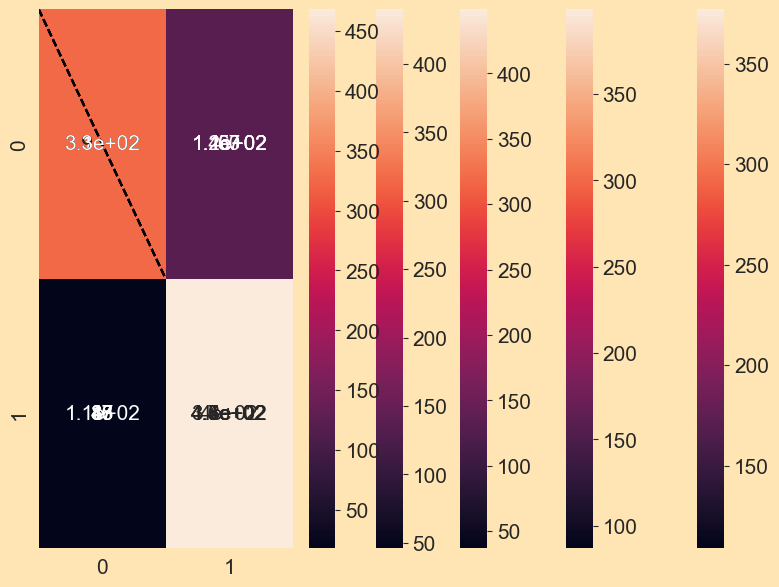

In [44]:
model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")
    fpr,tpr,thresholds=metrics.roc_curve(test_y,predm,pos_label=2)
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr)

#### accuracy score for  DecisionTreeClassifier() is :  0.9286024777222343 

### Hyperparameter tuning

#### Checking the Random Forest Classifier accuracy.

In [45]:
rf1=RandomForestClassifier(criterion='entropy', min_samples_split= 2, random_state= 13)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.9336188436830836
Cross Validation Score is : [0.86211513 0.85676037 0.85006693 0.85542169 0.83780161]
Mean Score : 0.8524331463476784


Random forest classifier gives the best accuracy so we applied hyper parameter tuning on it.

In [46]:
rf=RandomForestClassifier()
ran=[]
for i in range(20):
    ran.append(i)
    
dict2={"random_state":ran,'criterion':['gini', 'entropy', 'log_loss'],"min_samples_split":[1,2,3,4,5,6]}
gv=GridSearchCV(rf,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'gini', 'min_samples_split': 2, 'random_state': 0}

In [53]:
rf=RandomForestClassifier(criterion='gini', min_samples_split= 2, random_state= 0)
rf.fit(train_x,train_y)
prf=rf.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.9400428265524625
Cross Validation Score is : [0.86211513 0.85676037 0.85006693 0.85542169 0.83780161]
Mean Score : 0.8524331463476784


#### This is the best model, so saved this model and used it for prediction.

### Saving/Loading best model

In [54]:
import joblib
joblib.dump(rf,"glass_rfc.obj")

['glass_rfc.obj']

In [55]:
rfr=joblib.load('glass_rfc.obj')
result=rfr.predict(df_test_n)

In [56]:
res=pd.DataFrame(data=result.T)

In [57]:
predicted_subscription=pd.concat([df_test,res],axis=1)

In [58]:
predicted_subscription.to_csv("predicted_subscription.csv")

#### The predicted output has been saved and this completes the project.

# 